# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 58.5 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchmetrics.classification import Accuracy

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-12 18:43:26--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-12 18:43:26--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f6e940cd1177ba39dc82b07c6.dl.dropboxusercontent.com/cd/0/get/CHYl0jis2ROfaasDxmNXvnADpqYpz1aUdAJWxnnqVp3MAitZ0A5Qg4qeSKxHuV_MZWbR0dAVqcdVxcmwR0eR-_x1Uhpa5Y0hWdjiQ7JzoA60hxON6yeRlp2X2RoZ9gQapWdIN8vKTSTu8IMv1mxk9-Ig/file?dl=1# [following]
--2023-11-12 18:43:26--  https://uc4f6e940cd1177ba39dc82b07c6.dl.dropboxusercontent.com/cd/0/get/CHYl0jis2ROfaasDxmNXvnADpqYpz1aUdAJWxnnqVp3MAitZ0A5Qg4qeSKxHuV_MZWbR0dAVqcdVxcmwR0eR-_x1Uhpa5Y0hWdjiQ7J

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [6]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(123456)

from torchvision.transforms import v2

train_transform = v2.Compose([
    v2.ToImage(),
    v2.AutoAugment(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = ImageFolder('/content/dataset/dataset/train', transform = train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform = val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2) # YOUR CODE HERE

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

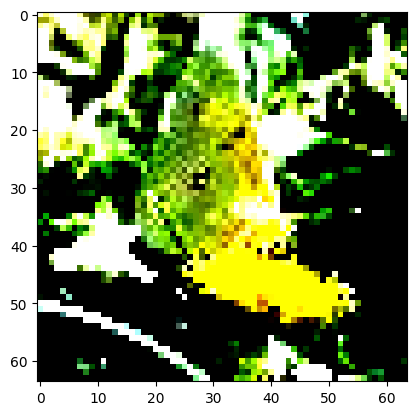

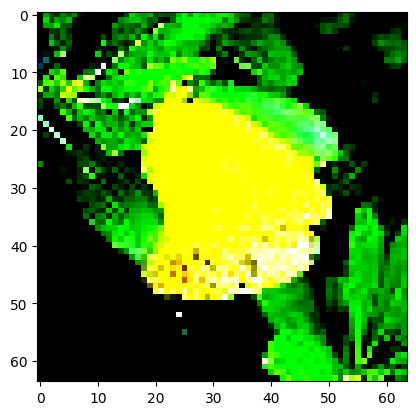

In [8]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[1].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [9]:
from torchvision.models import resnet18

In [10]:
from torchmetrics.functional import accuracy

class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(weights=None, num_classes=200)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor().to(device)
        self.preds = torch.Tensor().to(device)
        self.accuracy = 0

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)


    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [11]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super().__init__()
        self.save_hyperparameters()
        self.model = model
        self.lr = lr
        self.loss = nn.CrossEntropyLoss()

        wandb.init(project='uncategorized')

    def forward(self, x, target=None):
        preds = self.model(x, target)
        return preds

    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = self.lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=5, gamma=0.8)
        return [self.optimizer], [self.scheduler]


    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        # loss = self.loss(preds, target)
        acc = self.model.get_accuracy()
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        with torch.no_grad():
            loss = self.model(images, target)
            acc = self.model.get_accuracy()
        self.log('val_loss', loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)
        #wandb.log({"mean val loss": loss.item(),
                   #"mean val accuracy": acc.item()})

In [12]:
seed_everything(123456)

wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda"

model = YourNet().to(device)

lr = 0.0005

module = YourModule(model, lr)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
wandb: Currently logged in as: poligrrr561 (blablablabla). Use `wandb login --relogin` to force relogin


In [13]:
seed_everything(123456)

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


### Валидация результатов задания

In [14]:
def evaluate_task(model, test_dataloader):
    model = model.to(device)
    model.eval()
    accuracy_test = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=False)
        accuracy_test += acc_batch
    accuracy_test = accuracy_test / len(test_dataloader)
    return accuracy_test

In [15]:
## сохраняем модель
#torch.save(model, '/content/hw2_best_model1')

In [16]:
# дорогие ассистенты! если будете прогонять код заново, то так и оставьте, если нет, то я
# прекрепила модель (к этому и ко 2 заданию) к домашке, можете их просто подгрузить и
# раскомментить строчку ниже

# model = torch.load('hw2_best_model1')
# здесь и в функции evaluate_task пришлось поменять название эккюраси, а то оно путалось с функцией из torch.metrics и не прогонялось

accuracy_test = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_test.cpu() / 0.44, 0, 10):.2f} баллов")
print(accuracy_test)

100%|██████████| 79/79 [00:06<00:00, 12.11it/s]


Оценка за это задание составит 10.00 баллов
tensor(0.4541, device='cuda:0')


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [17]:
seed_everything(123456)

from torchvision.transforms import v2

train_transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((96, 96)),
    v2.AutoAugment(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((96, 96)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = ImageFolder('/content/dataset/dataset/train', transform = train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform = val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2) # YOUR CODE HERE

In [18]:
from torchvision.models import convnext_small

In [19]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = convnext_small(pretrained = True)
        self.model.classifier[2] = nn.Linear(768, 200)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor().to(device)
        self.preds = torch.Tensor().to(device)
        self.accuracy = 0

    def _forward(self, x):
        # with torch.no_grad():
        #     features = self.model(x)
        # preds = self.classifier(features)
        return self.model(x)


    def forward(self, images, target=None):
        output = self._forward(images)
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [20]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super().__init__()
        self.lr = lr
        self.model = model
        self.loss = nn.CrossEntropyLoss()

        wandb.init(project='hw2.22')

    def forward(self, x, target=None):
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=1, gamma=0.8)
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        acc = self.model.get_accuracy()
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        with torch.no_grad():
            loss = self.model(images, target)
            acc = self.model.get_accuracy()
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)

In [21]:
seed_everything(123456)

wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda"

model = YourNet().to(device)

lr = 1e-4

module = YourModule(model, lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Small_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_small-0c510722.pth" to /root/.cache/torch/hub/checkpoints/convnext_small-0c510722.pth
100%|██████████| 192M/192M [00:01<00:00, 106MB/s]


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_acc,▁▁▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▆▅▅▄▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_acc,▁▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇██
val_loss,█▅▄▃▂▂▁▂▁▁▁▁▁▂▂▃▃▄▄▄
epoch,19
train_acc,0.45395
train_loss,1.00281
trainer/global_step,15639
val_acc,0.45446


In [28]:
seed_everything(123456)

trainer = pl.Trainer(max_epochs=6, logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory ./lightning_logs/uvk45o6u/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | YourNet          | 49.6 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
49.6 M    Trainable params
0         Non-trainable params
49.6 M    Total params
198.434   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
# torch.save(model, '/content/hw2_best_model2')

#**NB!**:
мне так и не удалось понять, как работает рэндом сид, хоть я и наставила его во все ячейки, итоговый accuracy периодически меняется на десятые-сотые. Не знаю, как мои любимые ассистенты проверяют домашку (прогоняют ли все или смотрят на сохраненные модели), но очень прошу в случае прогона кода и недотягивания accuracy посмотреть на сохраненные модели!!

### Валидация результатов задания

In [29]:
# model = torch.load('/content/hw2_best_model2')

accuracy_test = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_test.cpu() - 0.5) / 0.34, 0, 10):.2f} баллов")


  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Оценка за это задание составит 10.00 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

# Задание 1: Хождение по мукам

**Том 1: выбор модели**

Эта часть задания и все возникающие в ней проблемы удалось решить достаточно быстро. Первым делом, с глупости и неопытности, я решила импортировать сеть `densenet201`, в которой было **20013928** обучаемых параметров, из-за чего первые попытки ее обучения быстро вывели меня из себя: это было невоносимо долго (а гпу кончился достаточно быстро)

Просмотрев список возможных сетей, я остановилась на `resnet18` - в ней значительно меньше обучаемых параметров + она не такая старая, как например `alexnet`, поэтому все мои надежды были возложены на нее.

**Том 2: аугментации**

Не уверена, существует ли какая-то здравая теория подборов аугментаций, а если такая все же и имеется, нам об этом точно не рассказывали. Полазив до документации (https://pytorch.org/vision/main/transforms.html) + посмотрев примерные картинки в датасете, среди которых я увидела лишь каких-то бабочек и цветочки, я решила, что не стоит включать различные цветовые аугментации: все-таки при определении бабочек цвет важен. Поэтому первоначально список аугментаций выглядел так:

```
train_transform = v2.Compose([
    v2.ToImage(),
    v2.RandomHorizontalFlip(p=0.2),
    v2.RandomVerticalFlip(p=0.3),
    v2.RandomRotation(20),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
```
*параметры для нормализации я украла из документации*

С этим списком и resnet18 я работала большую часть времени. Подбор лернинг рейта, эксперименты с `SGD` и `Adam`, различные шедулеры - все это давало один и тот же максимальный результат. Судя по графикам, модель просте перестала обучаться после примерно 15 эпохи или делала это слишком медленно. Я попробовала добавить агументации с цветом (`v2.ColorJitter(),
v2.Grayscale()`), но они с первых трех эпох давали качество значительно меньше. Графики всех этих экспериментов (различаются по лернинг рейту / шедулеру) можно посмотреть здесь: https://wandb.ai/blablablabla/uncategorized/reports/-1--Vmlldzo1OTQwOTk0?accessToken=jsdier3zqzlr1ut5u300rycwv8kzkerdv9qe3piy1c2rx8tgsdnpiotm9gzebg9g

**Что критически помогло решить проблему:** использование `AutoAugment`, о котором я прочитала все в той же документации (https://pytorch.org/vision/main/transforms.html) и решила попробовать. Тем самым, теперь мои трансформации выглядели так:

```
train_transform = v2.Compose([
    v2.ToImage(),
    v2.AutoAugment(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
```
Эксперимент удался с самого первого раза: качество модели сразу значительно улучшилось, а к 19 эпохе сошлось в нужному качеству. Даже с тем, что параметры шедулера и лернинг рейта я не меня с предыдущего раза. На этом я остановилась и перешла к следующему заданию.

# Задание 2: невыносимая легкость бытия

Чтобы разнообразить самой себе выполнение задания (*как будто до этого не было весело*), я решила сразу же поиграться с чуть более сложной моделью - `resnet50`. Ну и еще из логики о том, что вряд ли resnet18 вытянет на качество 0.84, поэтому чтобы не страдать - попробуем сразу чуть ее улучшить.

С `resnet50` ничего не получалось. С `resnet50` и `resnet152` - тоже.
  
Графики этих попыток вот здесь: https://api.wandb.ai/links/blablablabla/wmcapdvo

Суть была в том, что они легко выдавали качество около 0.3 после первой же эпохи, но дальнейший подбор лернинг рейта/шедулера не давал значительно прибавления качества: модели просто не учились (доходили до 0.4). Я решила, что дело кроета в недообученных параметрах на других слоях, поэтому поменяла стратегию: теперь вместе добавления последнего слоя и обучения на нем, я заменила последний слой на `nn.Linear()` с нужными выходами (200), а также поменяла параметр в `adam(self.model.classifier.parameters())` на `adam(self.model.parameters())`, то есть, дообучала всю модель. Также к этому сразу добавила ресайз: картинки до 64 на 64 (как и стоит в первом слое resnet)

К сожалению, на этих этапах у меня почему-то отвалился wandb: при попытке прогнать модель писало, что wandb.init() не отвечает (превышено время ожидания) и дальше все ломалось. Поэтому на этих итерациях эксперимента и я вовсе убрала wandb и логи метрик - так что графиков для этой части эксперимента у меня нет :( Но резюме сделать легко: качество улучшилось! Подскочило до 0.6 после первой эпохи, в лучших прогонах - доходило до 0.7, но этого все еще недостаточно.

На следующий день wandb починился (я ничего не делала, просто вернула код к исходному виду (с wandblogger и wanbd.init())), и теперь у нас есть графики!

Я решила, что раз `resnet` не учится, будем пробовать тяжелую артиллерию - `convnext`. Начала я с `convnext_tiny`, подбирала гп и выдумала лернинг рейты - училась хорошо, но чаще тоже завтревала на значениях около 0.7 (хотя сходилась к ним быстрее `resnet`). Шедулеры не помогали. Я решила не мучать себя и взять сразу `convnext_small`, а также посмотрела на первые строчки в архитектуре модели и увеличила ресайз до 96, как и было в архитектуре. На ней я и остановилась, так как к шестой эпохе получила нужное качество. Графики экспериментов с `convnext`: https://wandb.ai/blablablabla/hw2.22/reports/-2---Vmlldzo1OTQ2NTAy?accessToken=prsb5tye5aetnaytb55zwcw8rm4mhupso8tpn07llbcpy6jzq7ttexxiq0aht92c


! Справдливости ради отмечу, что пыталась бользоваться `Tuner` и `lr_finder` из него, но предлагаемые лернинг рейты совсем не давали даже близко нужного качества.

